# Практическая работа 2
## Спецкурс "Машинное обучение и искусственный интелект"

- Выполнил: **Савчук Д.И.**
- Группа: **М8О-103М-20**
- Задача: **Регрессия**
___
**Москва, 2021**

По заданным признакам определить стоимость продажи автомобиля.

Ссылка на датасет: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

Импортируем нужные библиотеки

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

## Анализ данных
Считаем данные из файла в память в виде объекта Pandas.DataFrame

In [38]:
data = pd.read_csv('Car_data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Число строк и столбцов:

In [39]:
data.shape

(301, 9)

Посмотрим на признаки и убедимся, что пропусков ни в одном из них нет – везде по 301 записи.

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Описание признаков

Посмотрим на основные статистические характеристики данных по каждому признаку: число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [41]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Посмотрим как признак Selling_Price зависит от других признаков.

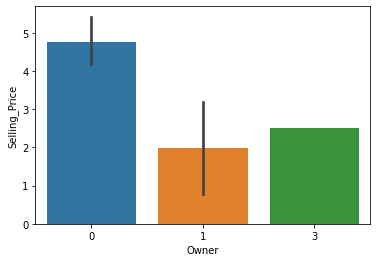

In [42]:
sns.barplot(x='Owner', y='Selling_Price', data=data);

Автомобили, принадлежащие владельцу 0, имеют самую высокую цену продажи.

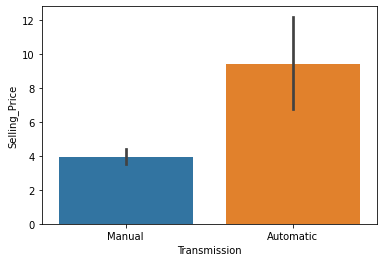

In [43]:
sns.barplot(x='Transmission', y='Selling_Price', data=data);

Автомобили с автоматической коробкой передач имеют большую стоимость при перепродаже на рынке по сравнению с механической коробкой передач.

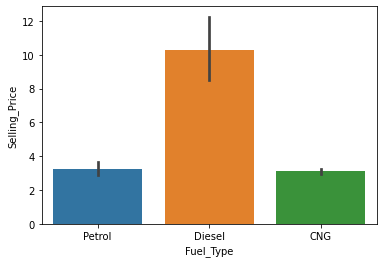

In [44]:
sns.barplot(x='Fuel_Type', y='Selling_Price', data=data);

Автомобили с дизельным двигателем имеют самую высокую цену продажи среди автомобилей с бензиновым двигателем и двигателем, работающим на сжатом природном газе.

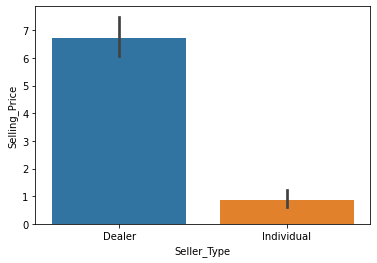

In [45]:
sns.barplot(x='Seller_Type', y='Selling_Price', data=data);

Дилеры продают автомобили по более высокой цене, чем обычные люди. 

Для того чтобы установить прямую связь между возрастом автомобился и ценой продажи введем новый признак «Vehicle_Age»

In [46]:
data['Vehicle_Age'] = 2021 - data['Year']
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


Преобразуем текстовые значения в целочисленные

In [47]:
data = pd.get_dummies(data, columns=['Fuel_Type', 'Transmission', 'Seller_Type'], drop_first=True)

Уберем столбец Year, так как он был переопределен новым признаком Vehicle_Age

In [48]:
data.drop(columns=['Year'], inplace=True)
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,ritz,3.35,5.59,27000,0,7,0,1,1,0
1,sx4,4.75,9.54,43000,0,8,1,0,1,0
2,ciaz,7.25,9.85,6900,0,4,0,1,1,0
3,wagon r,2.85,4.15,5200,0,10,0,1,1,0
4,swift,4.60,6.87,42450,0,7,1,0,1,0


Атрибут Fuel_Type теперь разделен на два новых атрибута, где «01» обозначает бензин (Petrol), «10» обозначает дизельное топливо (Diesel), а «00» обозначает сжатый природный газ (CNG).

Атрибут Transmission превратился в Transmission_Manual, где «1» означает ручной режим (Manual), а «0» - автоматический (Automatic).

Атрибут Seller_Type превратился в Seller_Type_Individual, где «1» обозначает Dealer, а «0» - Individual.

Построим график pairplot для визуального представления данных. На этом графике видно как связаны между собой различные признаки, на главной диагонали рисуются распределения признаков, а вне главной диагонали – диаграммы рассеяния для пар признаков.

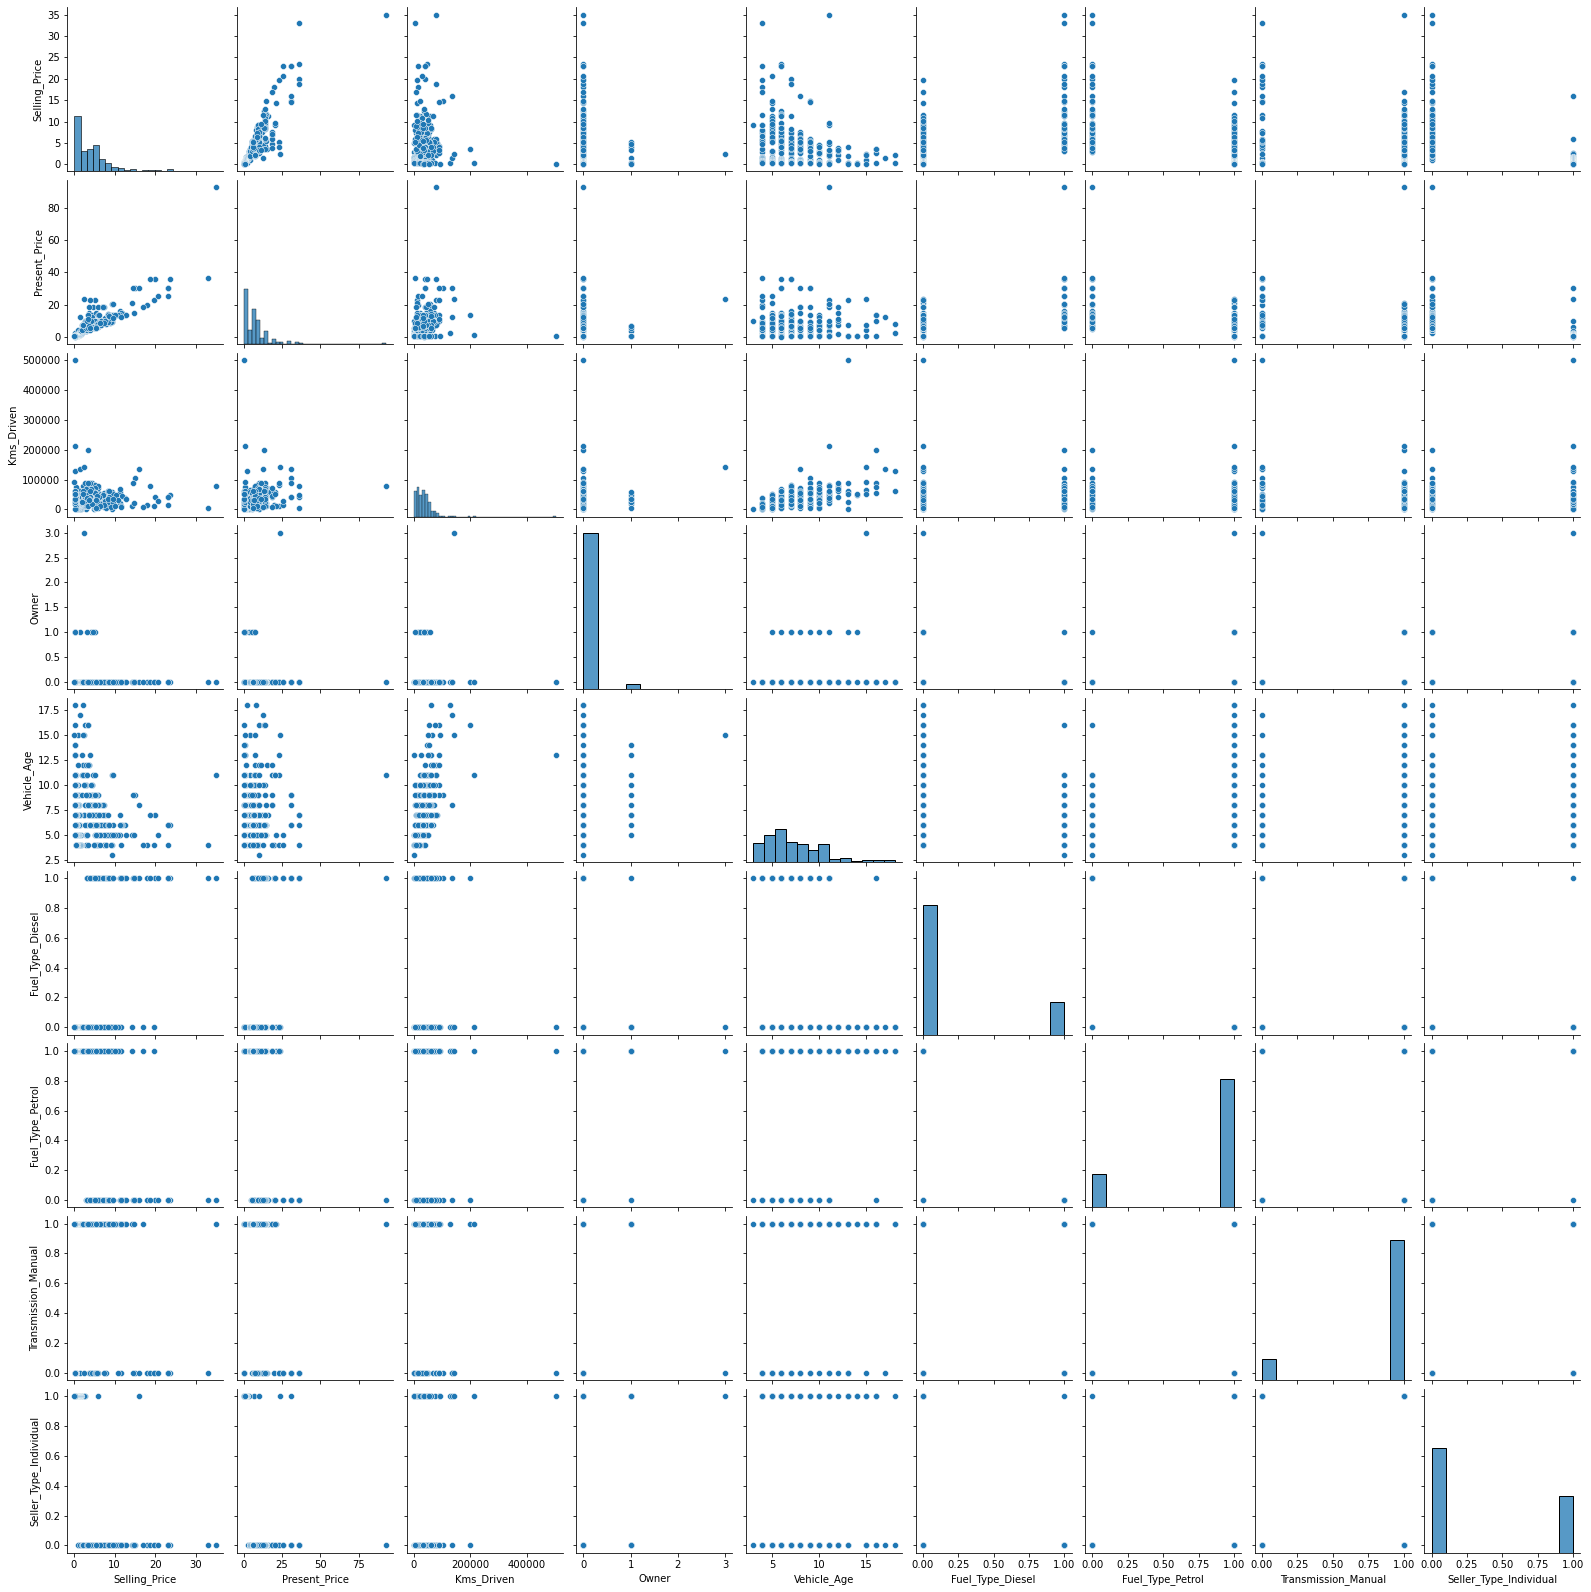

In [49]:
sns.pairplot(data);

Также построим корреляционную матрицу, показывающая корреляцию между признаками.

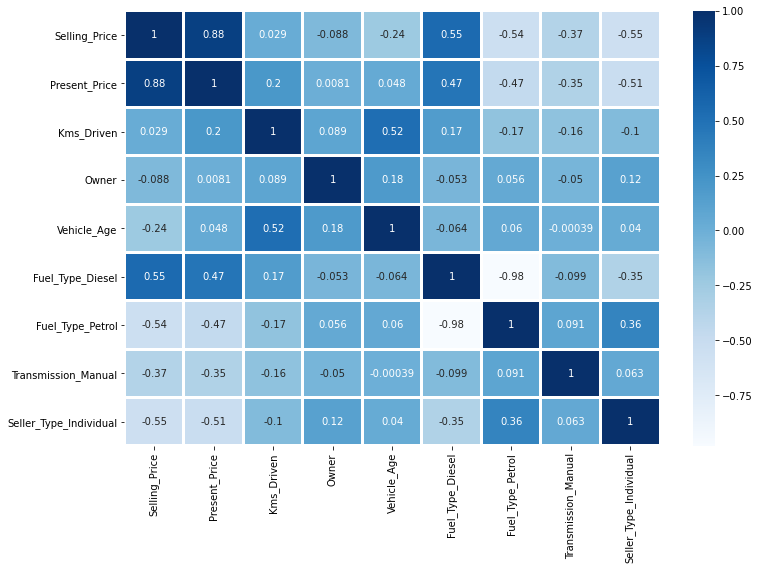

In [50]:
plt.figure(figsize=(12,8)) 
sns.heatmap(data.corr(), annot=True, cmap='Blues', linewidths = 2)
plt.show()

Как видно из графиков и корреляционной матрицы, Selling_Price в значительной степени коррелирует с характеристикой Present_Price. 

## Подготовка данных
Выделим 80% выборки (X_train, y_train) под обучение и 20% будут отложенной выборкой (X_test, y_test). Отложенная выборка никак не будет участвовать в настройке параметров моделей, на ней мы в конце, после этой настройки, оценим качество полученной модели.